#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Задачи для совместного разбора

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

2\. Настройте модель нейрона, используя метод стохастического градиентного спуска

## Задачи для самостоятельного решения

In [97]:
import torch as th
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

In [16]:
class Neuron:
  def __init__(self, weights):
    self.weights = weights

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, y_true):
    nabla_L = 2 * (self.forward(inputs)-y_true.reshape(-1,1))
    return inputs.T @ nabla_L / y_true.shape[0]

In [23]:
inputs = th.tensor([[1., 2., 3., 4.],
                    [1., 5., -4., 5.],
                    [1., -2., 3., 0.],
                    [1., 5., 4., 8.]])
y_true = th.tensor([5., -1, 2.3, 5.])
weights = th.normal(0,5,(4,1), requires_grad=True)

N1 = Neuron(weights)
N1.backward(inputs, y_true)

tensor([[ -7.9199],
        [-33.8570],
        [-69.3766],
        [-69.4045]], grad_fn=<DivBackward0>)

In [24]:
L = ((inputs@weights-y_true.reshape(-1,1))**2).mean() # MSE
L.backward()
weights.grad

tensor([[ -7.9199],
        [-33.8570],
        [-69.3766],
        [-69.4045]])

- [x] Проверено на семинаре

<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [346]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [347]:
class Neuron2:
  def __init__(self, weights):
    self.weights = weights

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, y_true):
    nabla_L = 2 * (self.forward(inputs)-y_true.reshape(-1,1))
    return inputs.T @ nabla_L / y_true.shape[0]

  def fit_minibatch(self, X, y, batch_size, learning_rate=0.1, add_bias=False):
    Xy = th.cat([X,y],-1)
    if add_bias:
      self.weights = th.cat([th.tensor([[1]]),self.weights],0)
      Xy = th.cat([th.ones(Xy.shape[0],1),Xy],-1)

    batches = th.split(Xy, batch_size)
    for batch in batches:
      X_, y_ = batch[:,:-1], batch[:,-1]
      self.weights -= learning_rate*self.backward(X_,y_)

In [348]:
coefs, bias = N2.weights[1:], N2.weights[0]
y_pred_fitted = X@coefs + bias
y_pred0 = X@weights0

print(f'MSE0: {th.mean((y_pred0-y)**2)}')
print(f'MSE_fitted: {th.mean((y_pred_fitted-y)**2)}')

MSE0: 9489.5654296875
MSE_fitted: 124.90898132324219


In [349]:
weights0 = th.normal(0,1,(X.shape[1],1))
print(weights0)

N2 = Neuron2(weights0)
N2.fit_minibatch(X,y,10,add_bias=True)
print(N2.weights)

tensor([[-1.2485],
        [-0.9257],
        [-0.1957],
        [ 1.3260]])
tensor([[ 2.8936],
        [ 4.8345],
        [77.5042],
        [26.3096],
        [33.7300]])


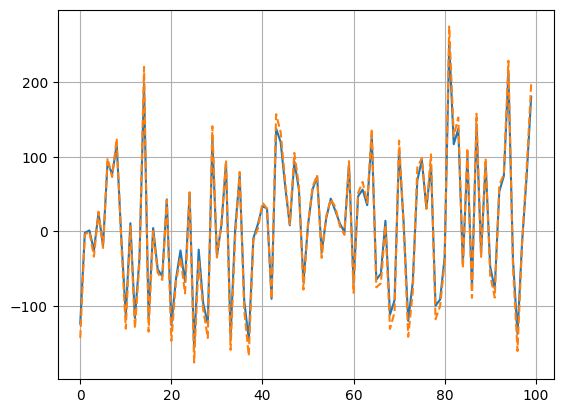

In [350]:
plt.plot(y_pred_fitted)
plt.plot(y, '--')
plt.grid()

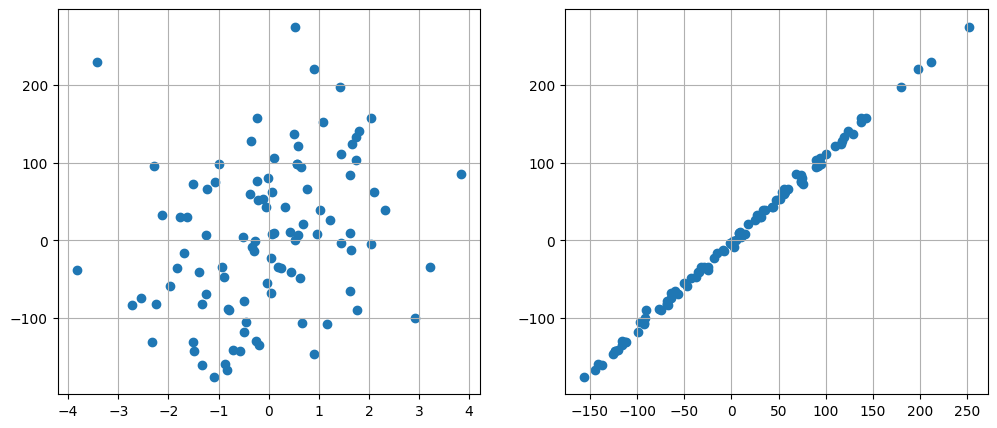

In [351]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
plt.scatter(y_pred0, y)
plt.grid()

ax = f.add_subplot(122)
plt.scatter(y_pred_fitted, y)
plt.grid()

<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

In [209]:
from torch.autograd import Variable

In [205]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.tensor(X, requires_grad=True, dtype=th.float32)
y = th.FloatTensor(y).reshape(-1, 1)

In [206]:
class Linear_lay:
  def __init__(self, n_features, n_neurons, weights=None):
    if weights is not None:
      self.weights = weights
    else:
      self.weights = th.normal(0,1,(n_features, n_neurons))

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, y_true):
    y_hat = inputs@self.weights
    nabla_L = 2 * (y_hat-y_true)

    nabla_w_L = inputs.T @ nabla_L / y_true.shape[0]
    nabla_X_L = nabla_L @ self.weights.T / y_true.shape[0]

    return nabla_w_L, nabla_X_L

In [207]:
# мой градиент
weights0 = th.normal(0,1,(4,4),requires_grad=True)
Ll = Linear_lay(4,4,weights0)
nabla_w_L, nabla_X_L = Ll.backward(X, y)
nabla_w_L

tensor([[  -5.4870,   -3.4000,   -3.0030,   -2.1066],
        [-166.1555, -173.6487, -172.4969, -171.6881],
        [ -73.2583,  -71.6243,  -69.1128,  -71.2957],
        [ -60.2163,  -59.9109,  -61.4341,  -58.2426]], grad_fn=<DivBackward0>)

In [208]:
# градиент PyTorch
w0 = Variable(weights0, requires_grad=True)
z = ((X@w0-y)**2).mean(dim=0)
z.backward(th.ones_like(z))
print(w0.grad)

tensor([[  -5.4870,   -3.4000,   -3.0030,   -2.1066],
        [-166.1555, -173.6487, -172.4969, -171.6881],
        [ -73.2583,  -71.6243,  -69.1128,  -71.2957],
        [ -60.2163,  -59.9109,  -61.4341,  -58.2426]])


In [215]:
# мой градиент (10 строк)
nabla_X_L[:10]

tensor([[  8.9511,  -0.5834,  -8.9940, -12.8013],
        [  0.0954,   0.1056,  -0.2174,  -0.2084],
        [  0.0131,  -0.0746,   0.0534,   0.0244],
        [  2.1249,  -0.0190,  -2.2400,  -3.1251],
        [ -1.6915,   0.2491,   1.5612,   2.3707],
        [  1.4736,  -0.0679,  -1.5085,  -2.0688],
        [ -6.4228,   0.3934,   6.4757,   9.0575],
        [ -4.5742,   0.2808,   4.6511,   6.3847],
        [ -7.9211,   0.7458,   7.7476,  11.1322],
        [  0.9313,   0.0291,  -1.0060,  -1.3799]], grad_fn=<SliceBackward0>)

In [216]:
# градиент PyTorch (10 строк)
X_ = Variable(X, requires_grad=True)
z = ((X_@w0-y)**2).mean(dim=0)
z.backward(th.ones_like(z))
print(X_.grad[:10])

tensor([[  8.9511,  -0.5834,  -8.9940, -12.8013],
        [  0.0954,   0.1056,  -0.2174,  -0.2084],
        [  0.0131,  -0.0746,   0.0534,   0.0244],
        [  2.1249,  -0.0190,  -2.2400,  -3.1251],
        [ -1.6915,   0.2491,   1.5612,   2.3707],
        [  1.4736,  -0.0679,  -1.5085,  -2.0688],
        [ -6.4228,   0.3934,   6.4757,   9.0575],
        [ -4.5742,   0.2808,   4.6511,   6.3847],
        [ -7.9211,   0.7458,   7.7476,  11.1322],
        [  0.9313,   0.0291,  -1.0060,  -1.3799]])


<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [273]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [355]:
class Linear_with_fit:
  def __init__(self, n_features, n_neurons, weights=None):
    if weights is not None:
      self.weights = weights
    else:
      self.weights = th.normal(0,1,size=(n_features, n_neurons))

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, y_true):
    y_hat = inputs@self.weights
    nabla_L = 2 * (y_hat-y_true)

    nabla_w_L = inputs.T @ nabla_L / y_true.shape[0]
    nabla_X_L = nabla_L @ self.weights.T / y_true.shape[0]
    return nabla_w_L, nabla_X_L

  def fit_minibatch(self, X, y, batch_size, learning_rate=0.1, add_bias=False):
    Xy = th.cat([X,y],-1)
    if add_bias:
      self.weights = th.cat([th.zeros(size=(1,self.weights.shape[1])),self.weights],0)
      Xy = th.cat([th.ones(Xy.shape[0],1),Xy],-1)

    batches = th.split(Xy, batch_size)
    for batch in batches:
      X_, y_ = batch[:,:-1], batch[:,-1].reshape(-1,1)
      self.weights -= learning_rate*self.backward(X_,y_)[0]

In [276]:
Llay = Linear_with_fit(4,4)
print('w0:')
print(Llay.weights)

Llay.fit_minibatch(X,y,10,add_bias=True)
print('w after fitting:')
print(Llay.weights)

w0:
tensor([[ 0.2695, -0.2104, -0.7328,  0.1043],
        [ 1.0414, -0.3997, -2.2933,  0.4976],
        [-2.4801, -0.4175, -1.1955,  0.8123],
        [-0.3063, -0.3302, -0.9808,  0.1947]])
w after fitting:
tensor([[ 2.8114,  2.8039,  2.8587,  2.7609],
        [ 4.9938,  4.9402,  4.8938,  4.9626],
        [77.8509, 77.5892, 77.4010, 77.6404],
        [25.9692, 26.2732, 26.2230, 26.4098],
        [33.4260, 33.4244, 33.2961, 33.5276]])


<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [412]:
import torch as th

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())

In [430]:
f1 = Linear_with_fit(1,10)
y_pred0 = f1.forward(X).mean(dim=1)
f1.fit_minibatch(X,y,20, learning_rate=0.1)
y_pred1 = f1.forward(X).mean(dim=1)
z1 = f1.forward(X)

f2 = Linear_with_fit(10,1)
y_pred2 = f2.forward(z1)
f2.fit_minibatch(z1,y,20, learning_rate=0.1)
y_pred3 = f2.forward(z1)
z2 = f2.forward(z1)

print(f'MSE: {th.mean((z2-y)**2)}')

MSE: 0.2940615713596344


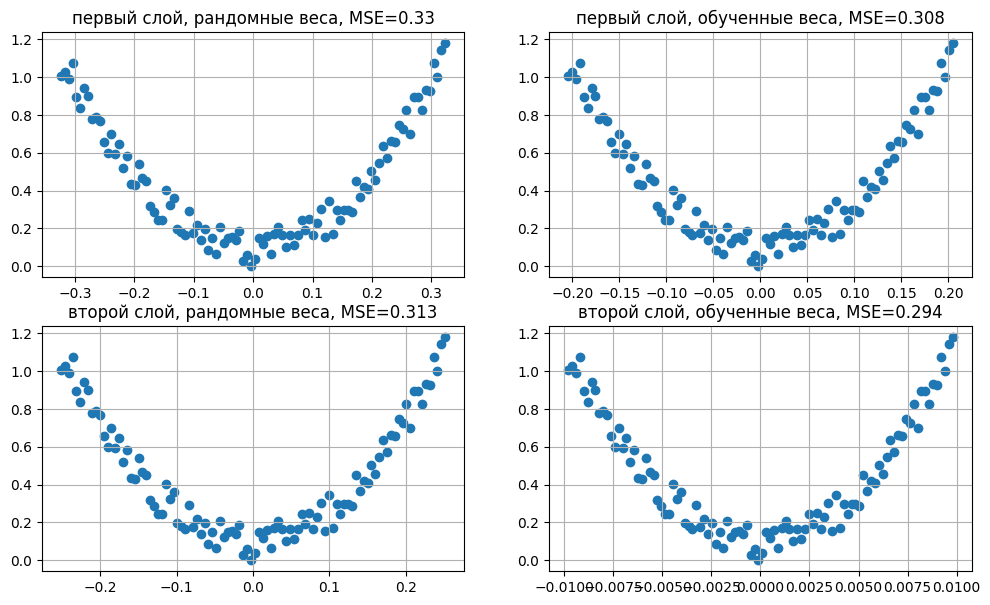

In [431]:
f = plt.figure(figsize=(12,7))

ax = f.add_subplot(221)
plt.scatter(y_pred0,y)
ax.set_title(f'первый слой, рандомные веса, MSE={round(th.mean((y_pred0-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(222)
plt.scatter(y_pred1,y)
ax.set_title(f'первый слой, обученные веса, MSE={round(th.mean((y_pred1-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(223)
plt.scatter(y_pred2,y)
ax.set_title(f'второй слой, рандомные веса, MSE={round(th.mean((y_pred2-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(224)
plt.scatter(y_pred3,y)
ax.set_title(f'второй слой, обученные веса, MSE={round(th.mean((y_pred3-y)**2).item(),3)}')
plt.grid()

<p class="task" id="6"></p>

6\. Cоздайте нейросеть и решите задачу регрессии из предыдущей задачи.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [432]:
import torch as th

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())

In [433]:
def ReLU(ten):
  ten[ten<=0] = 0
  return ten

In [434]:
ReLU(th.normal(0,1,(4,4)))

tensor([[0.6408, 0.5832, 1.0669, 0.0000],
        [0.0000, 0.5743, 0.1877, 0.0000],
        [0.2649, 1.2732, 0.0000, 0.0000],
        [0.0000, 0.1233, 0.3499, 0.6173]])

In [440]:
f1 = Linear_with_fit(1,10)
y_pred0 = f1.forward(X).mean(dim=1)
f1.fit_minibatch(X,y,20, learning_rate=0.1)
y_pred1 = f1.forward(X).mean(dim=1)
z1 = ReLU(f1.forward(X))

f2 = Linear_with_fit(10,1)
y_pred2 = f2.forward(z1)
f2.fit_minibatch(z1,y,20, learning_rate=0.1)
y_pred3 = f2.forward(z1)
z2 = f2.forward(z1)

print(f'MSE: {th.mean((z2-y)**2)}')

MSE: 0.3937321901321411


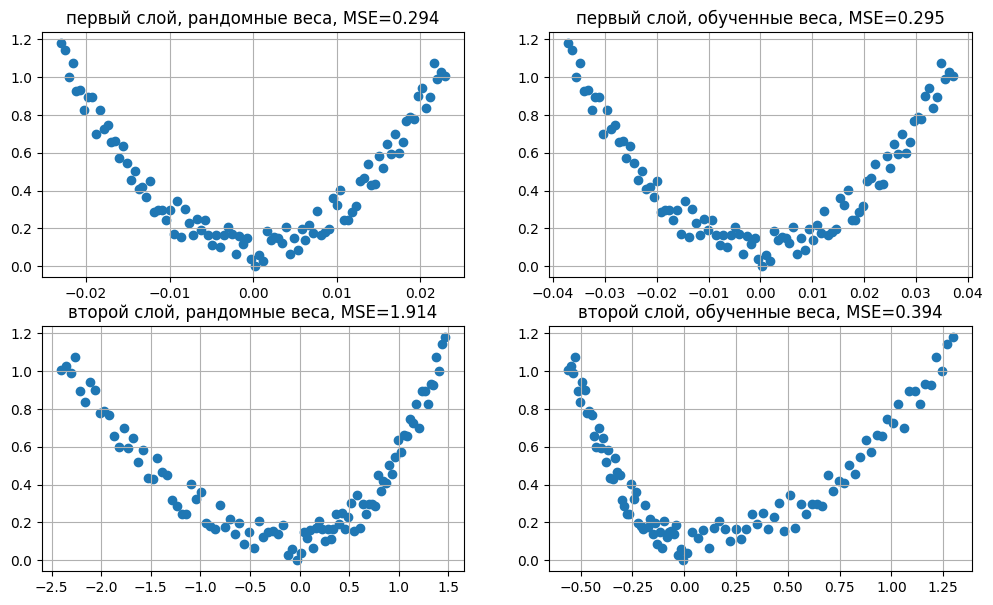

In [441]:
f = plt.figure(figsize=(12,7))

ax = f.add_subplot(221)
plt.scatter(y_pred0,y)
ax.set_title(f'первый слой, рандомные веса, MSE={round(th.mean((y_pred0-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(222)
plt.scatter(y_pred1,y)
ax.set_title(f'первый слой, обученные веса, MSE={round(th.mean((y_pred1-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(223)
plt.scatter(y_pred2,y)
ax.set_title(f'второй слой, рандомные веса, MSE={round(th.mean((y_pred2-y)**2).item(),3)}')
plt.grid()

ax = f.add_subplot(224)
plt.scatter(y_pred3,y)
ax.set_title(f'второй слой, обученные веса, MSE={round(th.mean((y_pred3-y)**2).item(),3)}')
plt.grid()

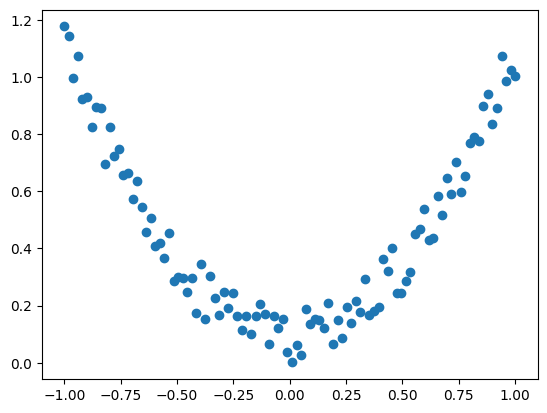

In [439]:
plt.scatter(X,y)

## Обратная связь
- [ ] Хочу получить обратную связь по решению